# GGplot Recipes
Recipes for Explodatory Data Analysis by means of plots

- toc: true 
- badges: true
- comments: false
- categories: [r]


*TOC*
* write a function for generating data
* use of melt for rearranging data
* create a base plot 
* add a boxplot to the base plot
* add a jiiter plot to the base plot
* merge boxplot and jiiter plot
* add a label to selected points in the jiiter plot
* use ggrepel to better visualize the label
* write a function to automatically select points based on a custom filter
* perform a t.test on data and use ggpubr to add brackets to a boxplot 
* create half-box plot


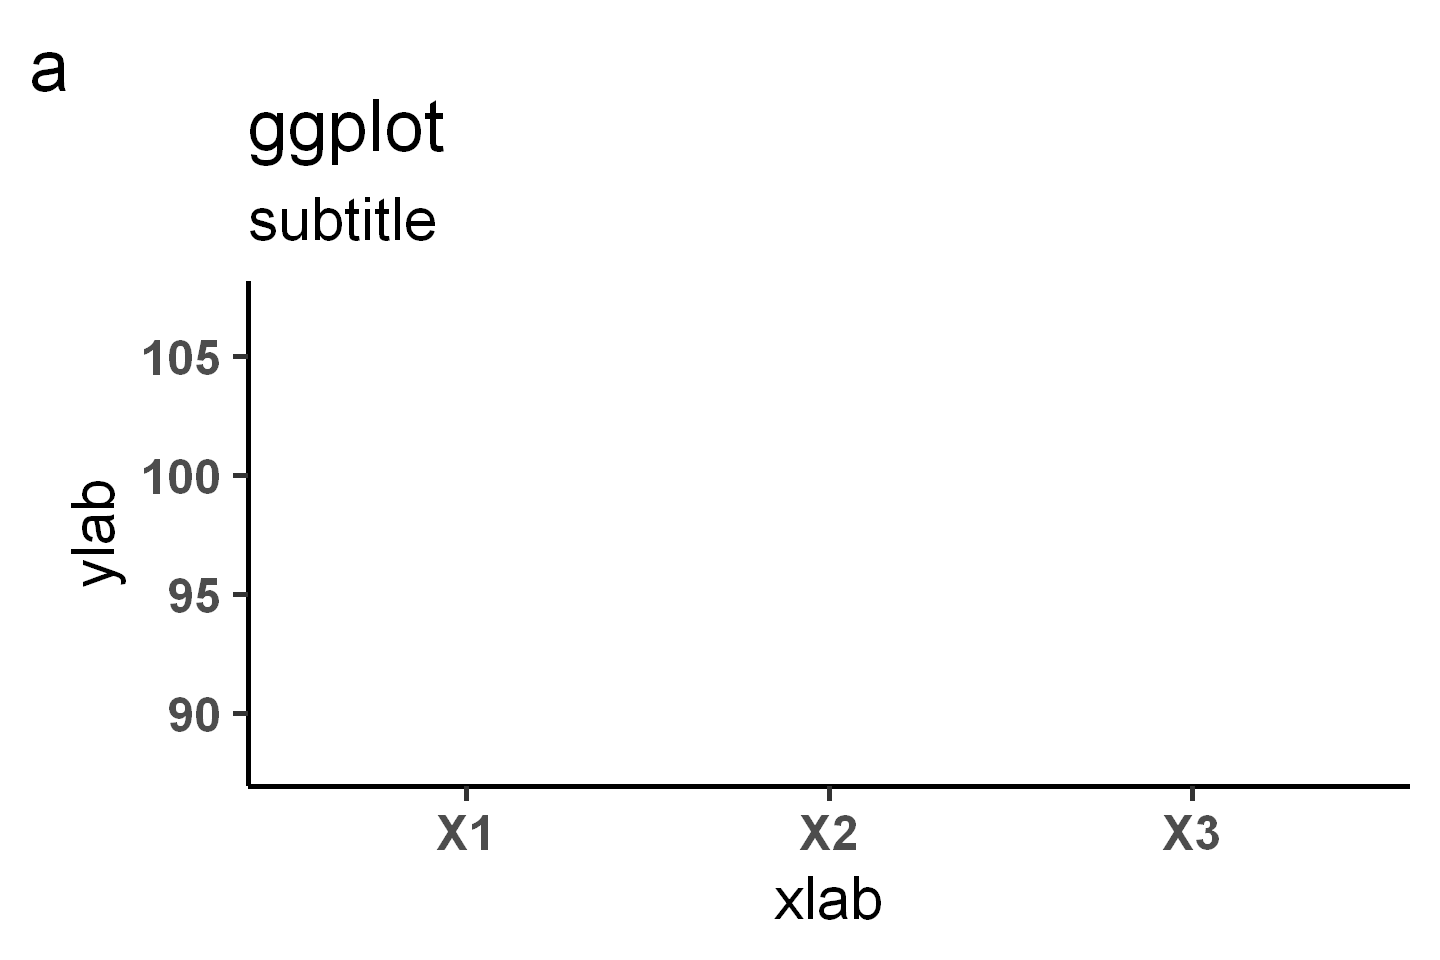

In [2]:
# loading libraries

library(ggplot2)
library(gridExtra)
library(data.table)
library(RColorBrewer)
library(ggpubr)
library(rstatix, warn.conflicts = FALSE)
library(ggrepel)

# building a function for generating data

genDataset <- function(number_of_rows,means,sds)
{
l <- length(means)
res <- lapply(seq(1:l),function(x) 
	   eval(parse(text=paste("rnorm(",number_of_rows,",",means[x],")",sep="")))) 
data.frame((sapply(res,c)))
return(res)
}

# generating data

dat <- genDataset(number_of_rows=100,
				  means=c(90,100,105),
				  sds=c(30,20,25))
				  
dat <- data.frame((sapply(dat,c)))
id <- rownames(dat)
dat <-  cbind(id=id,dat)
dt <- data.table(dat)

# rearranging table using melt from data.table 
dt.melt <- melt(dt, id.vars="id")
colnames(dt.melt) <- c("id","category","var1")


#creating base plot
base <- ggplot(dt.melt, aes(x=category, y=var1))		+
						labs(title = "ggplot",
						x		   = "xlab",
						y          = "ylab",
						subtitle = "subtitle",
						tag = "a")						+
		theme_classic(base_size = 36)					+
		theme(legend.position = "none",
			  axis.text.x = element_text(face="bold"),
			  axis.text.y = element_text(face="bold"))

base


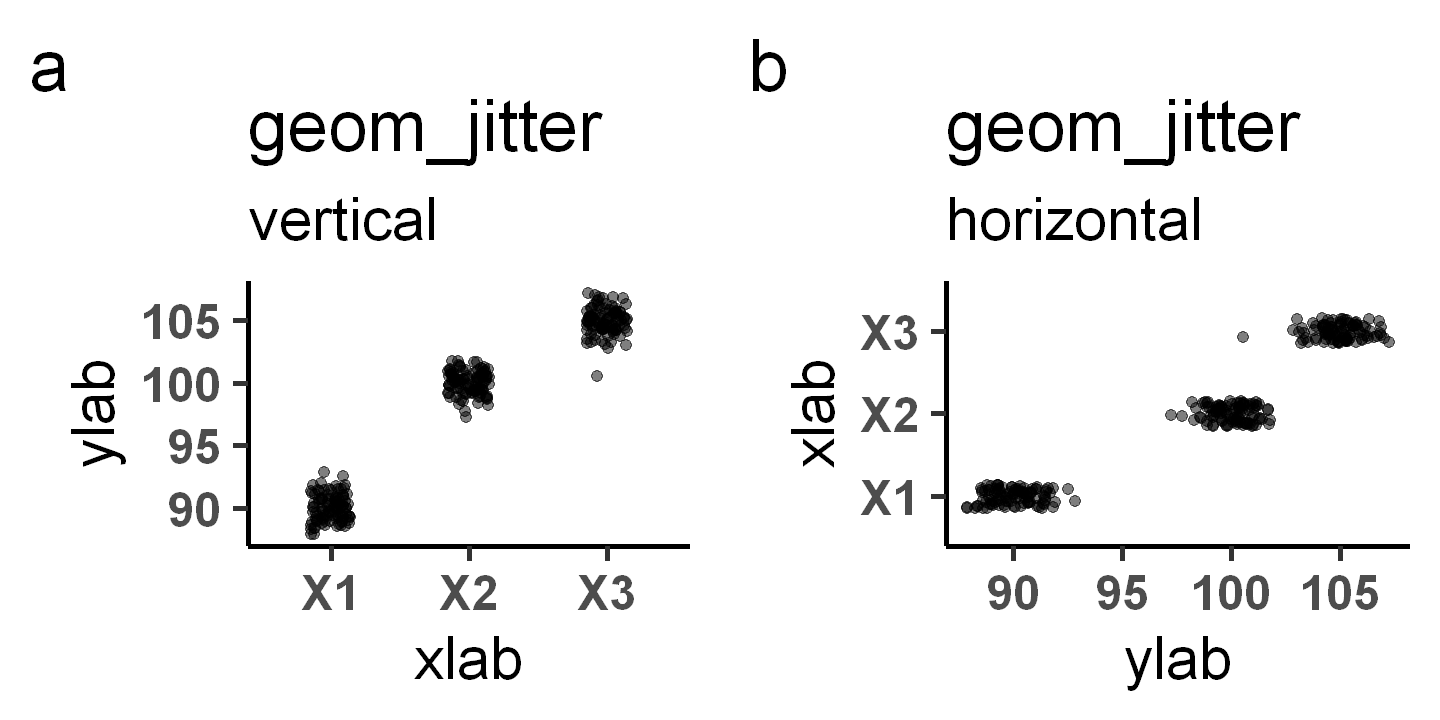

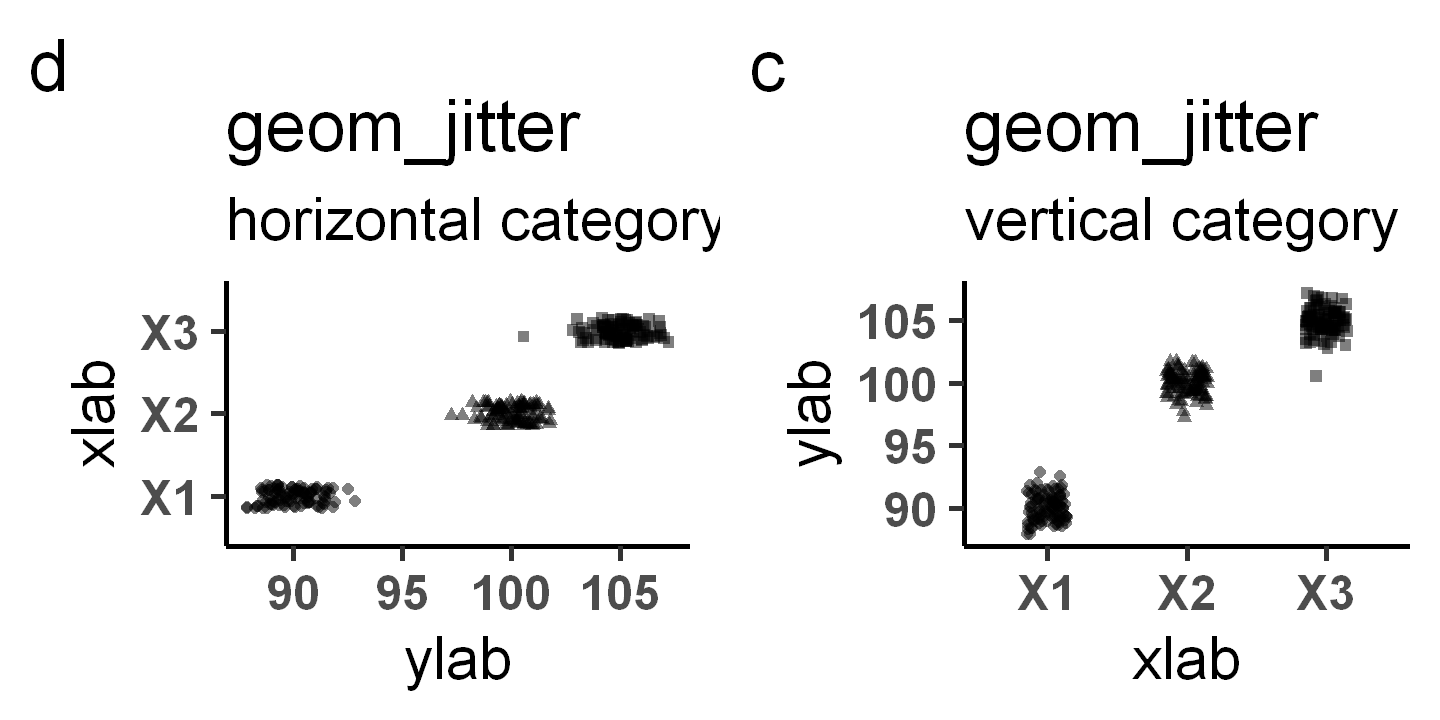

In [3]:
options(repr.plot.width = 12, repr.plot.height = 8)
#adding jiitter plot
pv  <- base + geom_jitter(
			 position = position_jitter(0.15),
			 alpha=0.5, size = 3) +
			 labs(title = "geom_jitter",
			 subtitle =   "vertical")
			 

ph  <- pv + coord_flip() + labs(title = "geom_jitter",
						   		subtitle = 	"horizontal",
								tag = "b")

pvc <- pv + aes(shape = category) + labs(title = "geom_jitter",
						   		    subtitle = 	"vertical category",
									tag = "c")			

phc <- pvc + coord_flip() + labs(title = "geom_jitter",
						   		subtitle = 	"horizontal category",
								tag = "d")

# preparing plot variations according to sequential,
# diverging and qualitative scheme colors using color brewer


library(gridExtra)
grid.arrange(pv, ph, ncol=2)
grid.arrange(phc, pvc, ncol=2)


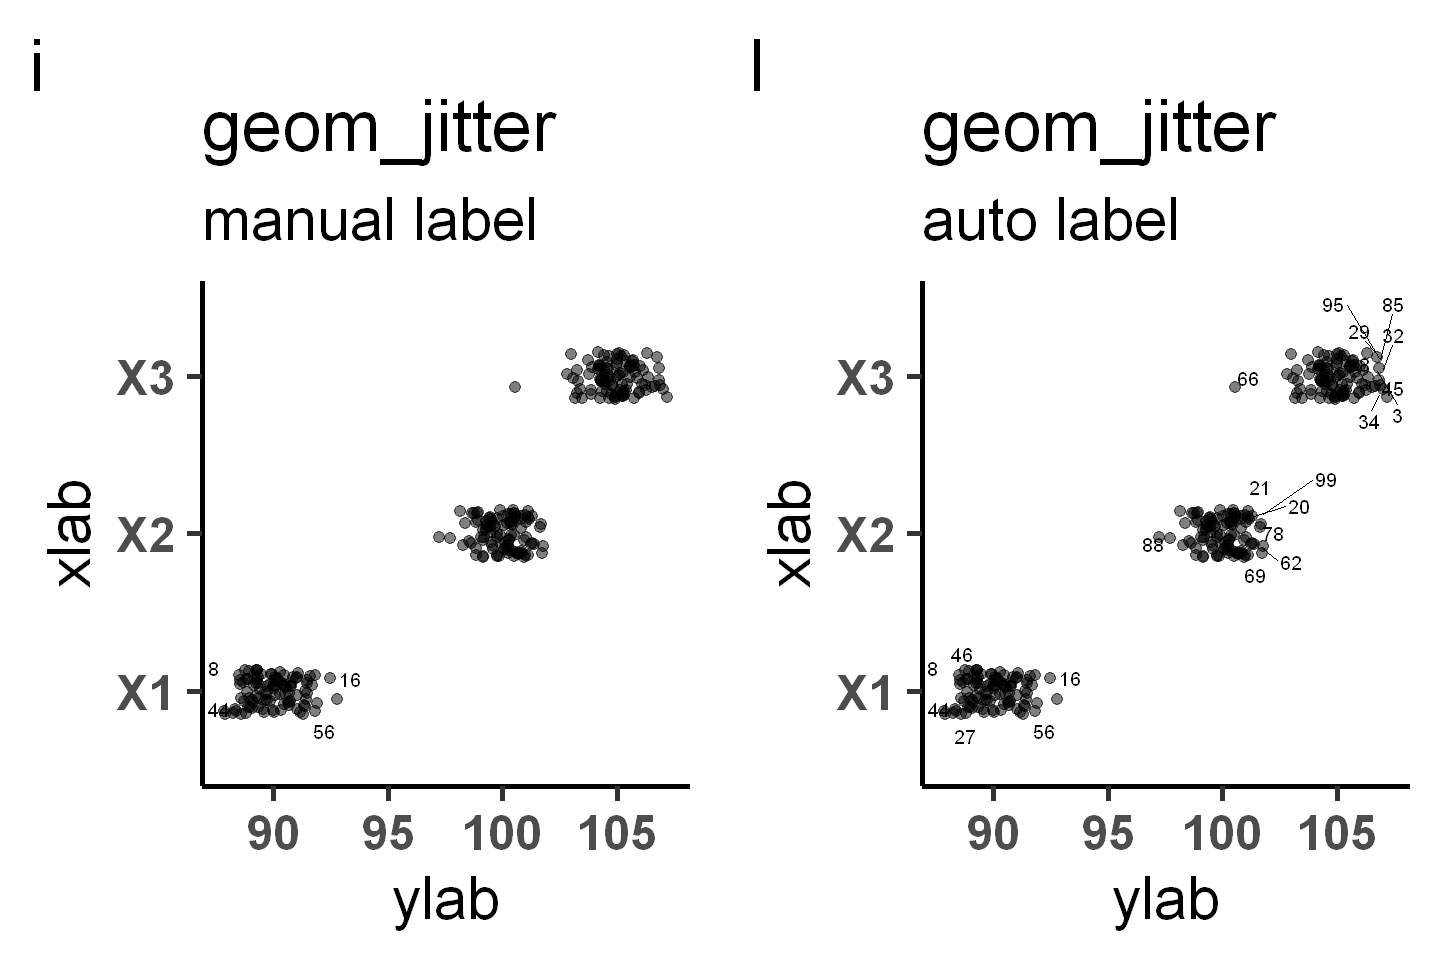

In [4]:
# adding labels to selected points

options(repr.plot.width = 12, repr.plot.height = 8)

uplim  <- 92
lowlim <- 88

#using gg_text_repel in order to better visualize the labels

p2 <- ph  + geom_text_repel(data=dt.melt[category=="X1"],
							aes(label=ifelse(((var1 > uplim | var1 < lowlim )),
							as.character(id),'')),
							position = position_jitter(0.2,seed = 1),size=4,
							) +
							labs(subtitle = "manual label",tag = "i")
						

# making the process automatic

# creating functions to highlight data depending on n sigma or
# a delta from the min and max 

NormTextlim <- function(x, nsigma){
					limup   <- mean(x)  + nsigma*sd(x)
					limlow  <- mean(x) - nsigma*sd(x)
					l       <- list("limup"=limup,"limlow"=limlow)
					return(l)
					}
					
Utextlim <- function(x, ndiv){
					nth_div <- (max(x)-min(x))/ndiv
					limup   <- max(x)  - nth_div
					limlow  <- min(x)  + nth_div
					l       <- list("limup"=limup,"limlow"=limlow)
					return(l)
					}

# creating a category index
unique_category <- unique(dt.melt$category)		

p3 <- ph +
	  lapply(seq(1,length(unique_category)), 
	  function(x) 
	  geom_text_repel(data=dt.melt[category==as.character(unique_category[x])],
	  aes(label=ifelse(((var1 > Utextlim((dt.melt[category==as.character(unique_category[x])])$var1,10)$limup | var1 < Utextlim((dt.melt[category==as.character(unique_category[x])])$var1,10)$limlow )),
	  as.character(id),'')),
	  position = position_jitter(0.2,seed = 1),size=4)) +
	  labs(subtitle = "auto label",tag = "l")

grid.arrange(p2, p3, ncol=2)

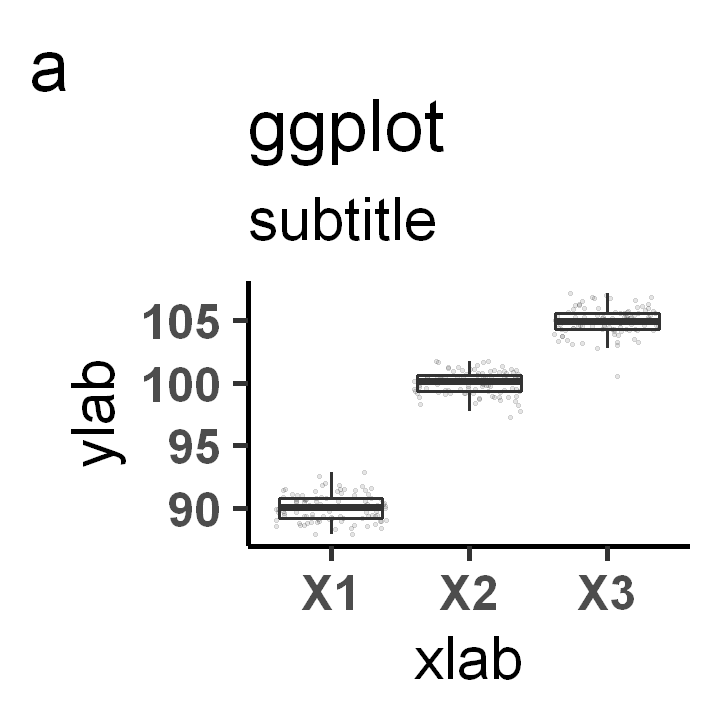

In [5]:
options(repr.plot.width = 6, repr.plot.height = 6)
p4 <- base + geom_jitter(alpha=0.1,size = 1) + geom_boxplot(alpha = 0,lwd=1) 
grid.arrange(p4, ncol=1)

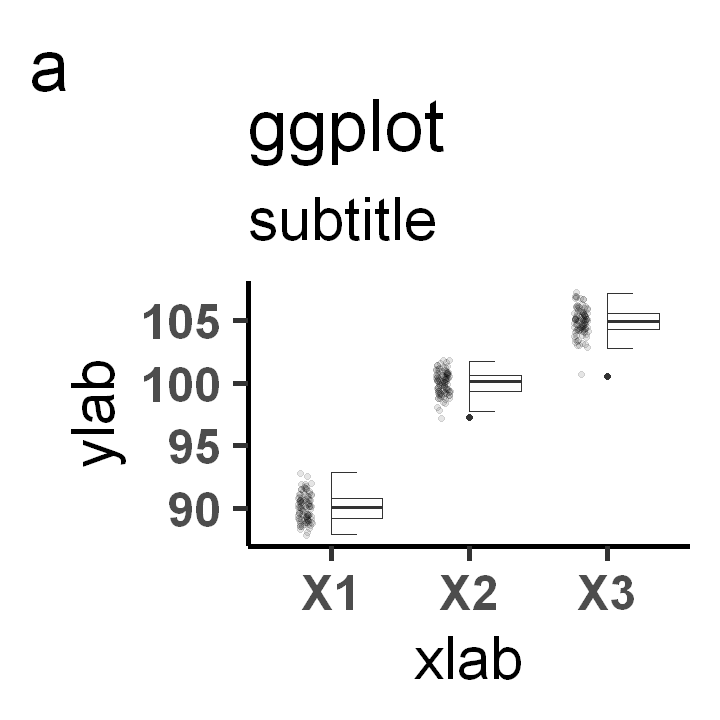

In [6]:
library(gghalves)
p6 <- base + geom_half_point(alpha=0.1, side="l") + geom_half_boxplot(side="r")
p6

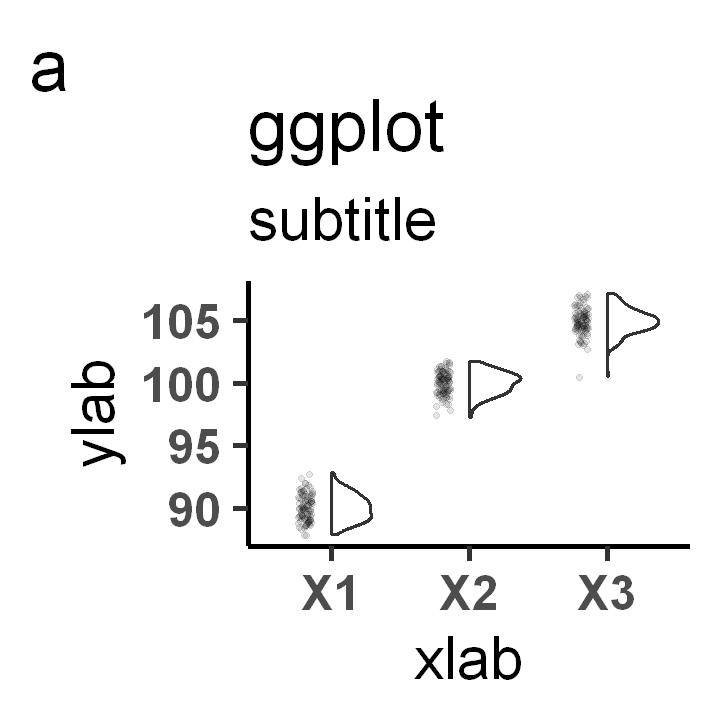

In [7]:

options(repr.plot.width = 6, repr.plot.height = 6)
library(gghalves)

p8 <- base + geom_half_point(alpha=0.1, side="l") + geom_half_violin(side="r",lwd=1)
p8

